# Data Analysis Report: Kyphosis Dataset

## 1. Objective of the Analysis
### The primary goal of this analysis is to build and evaluate machine learning models to predict the presence of kyphosis (a spinal deformity) after corrective spinal surgery in children. The analysis focuses on prediction, aiming to classify whether kyphosis is "absent" or "present" based on pre-surgery attributes. Secondary goals include understanding model interpretability and providing actionable insights to stakeholders such as medical practitioners and researchers.

## 2. Dataset Description
### Kyphosis Dataset

### Number of Rows: 81
### Number of Columns: 4
## Attributes:
### Age: Age of the child in months.
### Number: Number of vertebrae involved in the surgery.
### Start: Number of the first (highest) vertebra operated on.
### Kyphosis: Output variable indicating if kyphosis is "absent" or "present" after surgery.

## Objective: To predict the occurrence of kyphosis based on features such as age, number of vertebrae, and the starting vertebra of the surgery.

## 3. Data Exploration and Cleaning
### Data Loading and Initial Exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('kyphosis.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

print("\nFirst few rows of the dataset:")
print(df.head())

print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB
None

First few rows of the dataset:
  Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

Descriptive Statistics:
       Kyphosis         Age     Number      Start
count        81   81.000000  81.000000  81.000000
unique        2         NaN        NaN        NaN
top      absent         NaN        NaN        NaN
freq         64         NaN        NaN        NaN
mean        NaN   83.654321   4.049383  11.493827
std         NaN   58.104251   1.619423   4.883962
min     

## Basic Information:

### The dataset contains 81 rows and 4 columns.
### The columns are Age, Number, Start, and Kyphosis.
## Initial Data Preview:

### The head() method shows the first few rows of the dataset.
## Descriptive Statistics:

## Provides summary statistics for both numerical and categorical features.

## Checking for Missing Values

In [2]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64


## Missing Values:
### The dataset has no missing values, so no imputation or removal is necessary.

## Exploring the Target Variable


Distribution of Target Variable:
Kyphosis
absent     64
present    17
Name: count, dtype: int64


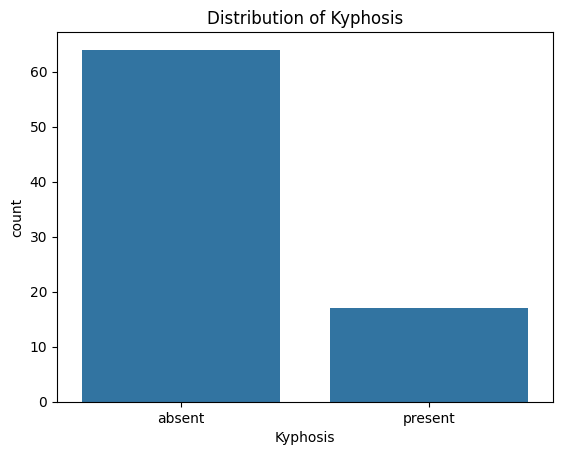

In [3]:
# Explore the distribution of the target variable
print("\nDistribution of Target Variable:")
print(df['Kyphosis'].value_counts())

# Plot the distribution of the target variable
sns.countplot(data=df, x='Kyphosis')
plt.title('Distribution of Kyphosis')
plt.show()


## Class Distribution:
### Shows the count of "absent" and "present" cases in the target variable.
### Visualization helps to understand class balance.
## Feature Relationships and Correlation

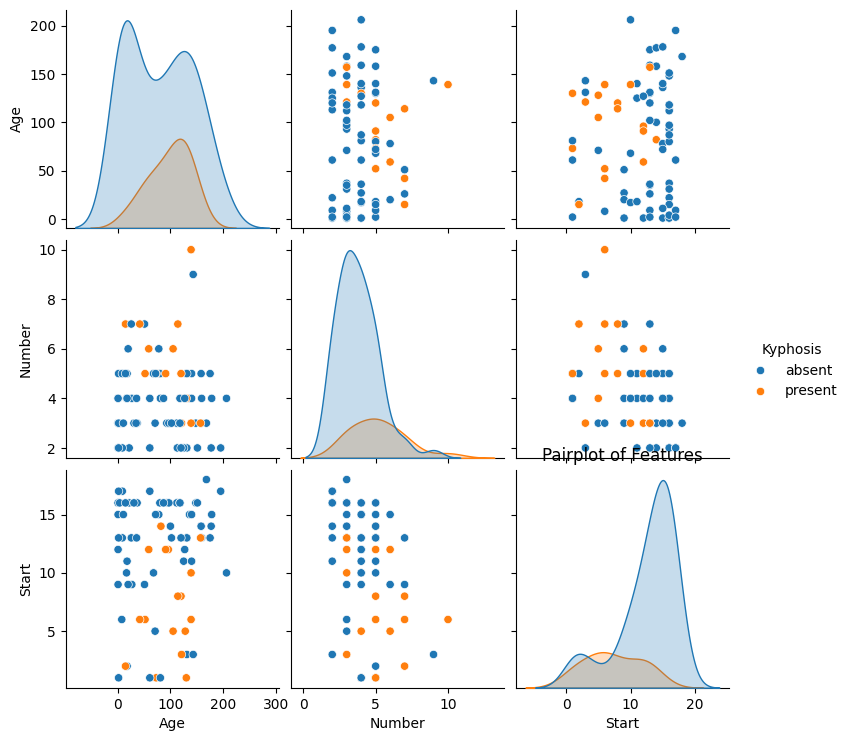


Correlation Matrix:
             Age    Number     Start
Age     1.000000 -0.016687  0.057828
Number -0.016687  1.000000 -0.425099
Start   0.057828 -0.425099  1.000000


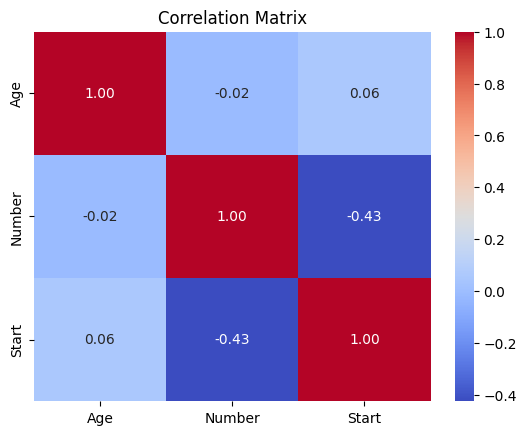

In [4]:
# Explore relationships between features
sns.pairplot(df, hue='Kyphosis')
plt.title('Pairplot of Features')
plt.show()

# Correlation matrix to check for feature correlations
correlation_matrix = df[['Age', 'Number', 'Start']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Pairplot:

### Visualizes relationships between numerical features and how they relate to the target variable.
### Correlation Matrix:

### Shows correlations between features, helping to identify potential multicollinearity or feature interactions.

## 4. Model Training

## Logistic Regression

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


# Load the dataset
df = pd.read_csv('kyphosis.csv')

# Encode categorical target variable (Kyphosis) as binary
df['Kyphosis'] = df['Kyphosis'].apply(lambda x: 1 if x == 'present' else 0)

# Define features and target variable
X = df[['Age', 'Number', 'Start']]
y = df['Kyphosis']

# Check overall class distribution
print("\nOverall Class Distribution in Dataset:")
print(y.value_counts())

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution in training and testing sets
print("\nTraining Set Class Distribution:")
print(y_train.value_counts())
print("\nTesting Set Class Distribution:")
print(y_test.value_counts())



# Verify resampling
print("\nResampled Training Set Class Distribution:")
print(pd.Series(y_train).value_counts())

# Train Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))



Overall Class Distribution in Dataset:
Kyphosis
0    64
1    17
Name: count, dtype: int64

Training Set Class Distribution:
Kyphosis
0    51
1    13
Name: count, dtype: int64

Testing Set Class Distribution:
Kyphosis
0    13
1     4
Name: count, dtype: int64

Resampled Training Set Class Distribution:
Kyphosis
0    51
1    13
Name: count, dtype: int64

Logistic Regression Accuracy: 0.9411764705882353
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.75      0.86         4

    accuracy                           0.94        17
   macro avg       0.96      0.88      0.91        17
weighted avg       0.95      0.94      0.94        17



## Logistic Regression:
### Provides a baseline model with interpretable coefficients.
### Accuracy and classification report metrics provide performance details.

## Decision Tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8235294117647058
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.25      0.40         4

    accuracy                           0.82        17
   macro avg       0.91      0.62      0.65        17
weighted avg       0.86      0.82      0.78        17



## Decision Tree:
### Handles non-linear relationships and provides a visual representation of decision rules.
### Accuracy and classification report metrics are used to assess performance.

# Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7647058823529411
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.50      0.25      0.33         4

    accuracy                           0.76        17
   macro avg       0.65      0.59      0.60        17
weighted avg       0.73      0.76      0.73        17



## Random Forest
### An ensemble method that improves prediction accuracy and reduces overfitting.
### Provides feature importance and better performance in most cases.

# XGBoosst Classifier

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train XGBoost
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

# Print the results
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8235294117647058
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.25      0.40         4

    accuracy                           0.82        17
   macro avg       0.91      0.62      0.65        17
weighted avg       0.86      0.82      0.78        17



## XGBoost:
### An ensemble method that improves prediction accuracy and reduces overfitting.
### Provides feature importance and better performance in most cases.

# 5. Model Recommendation

## Based on the analysis:

### Logistic Regression is recommended as the final model. It provides the highest accuracy ,precision and recall.

# END